## A Brief Tutorial on Using the Dataset

The Virginia Tech Natural Motion Dataset contains .h5 and .mvnx files with unscripted human motion data collected in real-world environments as participants went about their day-to-day lives. This is a brief tutorial in using the dataset and our library. 

We will cover how to extract data from the .h5 files and visualize motion with forward kinematics.

In [1]:
# Setting up the notebook
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import torch
import numpy as np
import os
import glob

from common.data_utils import read_h5

### Creating a small dataset

We will assume that part of the dataset is downloaded and stored in the root directory of this project in a folder titled data.

In [2]:
filepaths = glob.glob('../data/*.h5')

With a list of file paths, we can then make a request to extract data from the files.

In [3]:
requests = {'orientation' : ['T8', 'Neck', 'Head'],
           'acceleration': ['T8', 'Neck', 'Head']  
           }
dataset = read_h5(filepaths, requests)

Now we will have a dataset dictionary mapping our filenames to the orientation and acceleration of the T8 (sternum), Head and Neck.

In [4]:
filename = filepaths[0].split('/')[-1]
dataset[filename]['orientation'].shape

(678456, 12)

The dataset will contain 678456 frames of orientation data for our first file for the three segments we requested. The orientation data are stored as quaternions, so there are 4 values for each segment.

### Visualizing motion

To visualize motion, we wrote a forward kinematics class called Skeleton.

In [5]:
from common.skeleton import Skeleton
skeleton = Skeleton()

To read in data for the entire human body that we'd like to visualize, we can use the ['all'] request.

In [6]:
requests = {'orientation' : ['all']}
dataset = read_h5(filepaths, requests)

We can now visualize human motion using the skeleton and dataset.

<IPython.core.display.Javascript object>


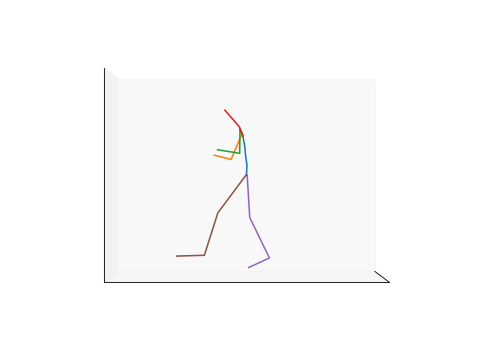

In [7]:
azim, elev = 0, 0

human_motion = torch.Tensor(dataset[filename]['orientation'][620000:621000:10])
line_ani = skeleton.animate_motion(human_motion, azim, elev)